In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 

In [3]:
dataset = pd.read_csv('Salary_Data.csv')

## FROM SKLEARN ##

In [4]:

X = dataset.iloc[:, :-1].values     # variables independantes
y = dataset.iloc[:, -1].values      #variables dependantes

# pas de donnes manquantes dans ce dataset pas de variable scategoriques mais numerique continue
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1.0/3, random_state = 0)
# pas de Feature scaling dans la regression lineaire car tout sera a la meme echelle du fait u coef


In [152]:

# Construction du modele
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#  Faire de nouvelles predictions
X_test
y_pred  = regressor.predict(X_test) # valeur des VI dont on peut predire la valeur des VD
y_pred # predictions a partir de valeurs dans le test set que nous avonc construit
regressor.predict([[15]])# predictions vous VIqui ne sont pas dans le X_dataset



array([167005.32889087])

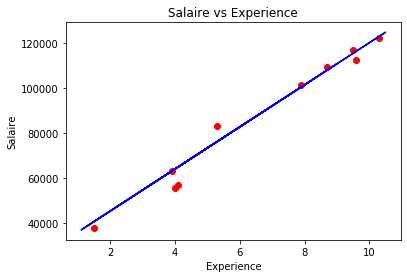

In [154]:
# Visulaliser les resultats
plt.scatter(X_test, y_test, color = 'red')   # placer des points
plt.plot(X_train, regressor.predict(X_train), color = 'blue') # tracer une droite, ordonnes regressor car on veut la predictio
plt.title('Salaire vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.show()

In [155]:
dataset.shape

(30, 2)

In [156]:
dataset.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


## FROM SCRATCH ##

Text(0, 0.5, 'Salaire')

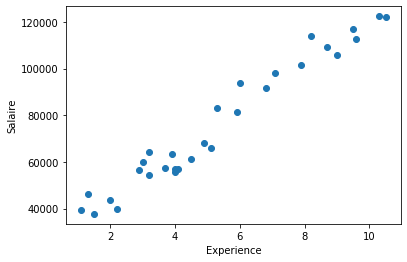

In [5]:
X1 = dataset.iloc[:, :-1].values
y1 = dataset.iloc[:, -1].values
#visualize dataset
plt.plot(X1 ,y1, 'o')
plt.xlabel('Experience')
plt.ylabel('Salaire')

In [6]:
# desactiver pour avoir les meme resultat entre sklearm er fron scratch
#X_train = np.array(dataset.YearsExperience[0:20]).reshape(20, 1)
#X_test = np.array(dataset.YearsExperience[20:30]).reshape(10, 1)
#y_train = np.array(dataset.Salary[0:20]).reshape(20, 1)
#y_test = np.array(dataset.Salary[20:30]).reshape(10, 1)

In [7]:
print("Shape de X_train est :{}".format(X_train.shape))
print("Shape de y_train est :{}".format(y_train.shape))
print("Shape de X_test est :{}".format(X_test.shape))
print("Shape de y_test est :{}".format(y_test.shape))

Shape de X_train est :(20, 1)
Shape de y_train est :(20,)
Shape de X_test est :(10, 1)
Shape de y_test est :(10,)


**Forward propagation**

'f(x) = w*x + b' (w et b) sont les parametres qu'on doit apprendre pendant le training 

In [8]:
def forward_propagation(train_dataset, parameters):
    w = parameters['w']
    b = parameters['b']
    predictions = np.multiply(w, X_train) + b
    return predictions

**Define Cost function**

mean squared error:  cost = [(y - f(x)) ^ 2] * 0.5. y est la valeur label et f(x) est la valeur predite. y => y_train, f(x) => predictions

In [9]:
def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions)**2)*0.5
    return cost

**Gradient descend for backpropagation, derive partiel est 'd', 'f(x) = w*x + b'**

- Partial Derivative of cost function  w
        - dc/dw = dc/df * df/dw 
- Partial Derivative of cost function  b
        - dc/db = dc/df * df/db 

- dc/df = (y-f)*-1
- df/dw = x
- df/db =1 

In [10]:
def backward_propagation(X_train, y_train, predictions):
    derivatives = dict() # function creates a dictionary
    df = (y_train - predictions) * -1  # dc/df = (y-f)*-1
    dw = np.mean(np.multiply(X_train, df))
    db = np.mean(df)
    derivatives['dw'] = dw
    derivatives['db'] = db
    return derivatives  

**Update parameters**

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['w'] = parameters['w'] - learning_rate * derivatives['dw']
    parameters['b'] = parameters['b'] - learning_rate * derivatives['db']
    return parameters
    

**train Data**

In [20]:
def train(X_train, y_train, learning_rate, iters = 10):
    # parametres aleatoires
    parameters = dict()
    parameters['w'] = np.random.uniform(0.1) * -1
    parameters['b'] = np.random.uniform(0.1) * -1
    plt.figure()
    time.sleep(6) 
    # loss
    loss = list()
    # iterate
    for i in range(iters):
        #forward propagation
        predictions = forward_propagation(X_train, parameters)
        time.sleep(6)
        #cost function
        cost = cost_function(predictions, y_train)
        time.sleep(6)
        #append loss
        loss.append(cost)
        time.sleep(6)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        time.sleep(6)
        #plot
        plt.plot(X_train, y_train, 'o')
        plt.plot(X_train, predictions, 'x')
        plt.show()
        time.sleep(6)
        #back probagation
        derivatives = backward_propagation(X_train, y_train, predictions)
        time.sleep(6)
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        time.sleep(6)
    return parameters, loss

**trainings**

Iteration = 1, Loss = 2820344344.168856


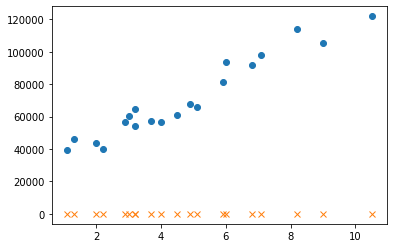

Iteration = 2, Loss = 1815224675.1722474


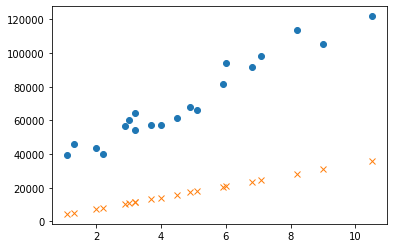

Iteration = 3, Loss = 1315360306.7665408


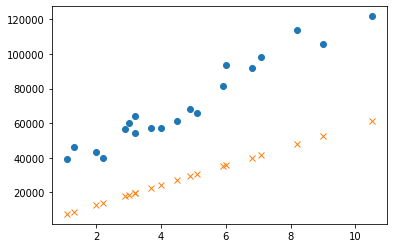

Iteration = 4, Loss = 1066195638.8015758


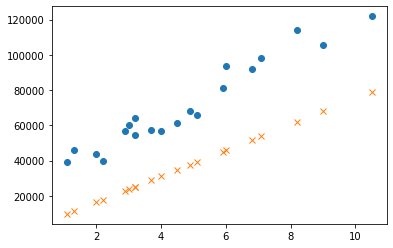

Iteration = 5, Loss = 941426688.4419153


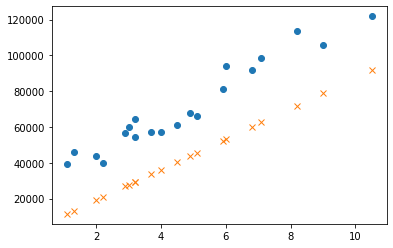

Iteration = 6, Loss = 878384636.7365999


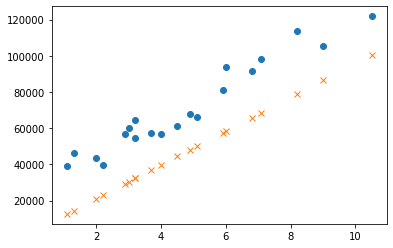

Iteration = 7, Loss = 845974801.3682779


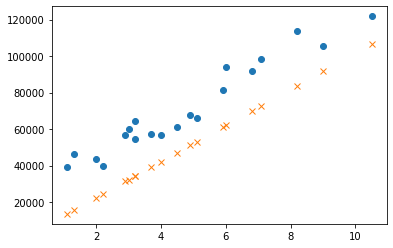

Iteration = 8, Loss = 828768777.0628679


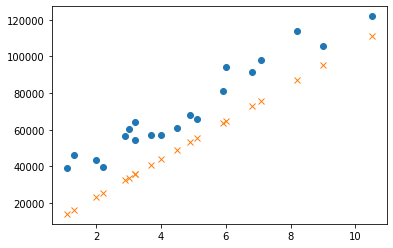

Iteration = 9, Loss = 819111363.5812232


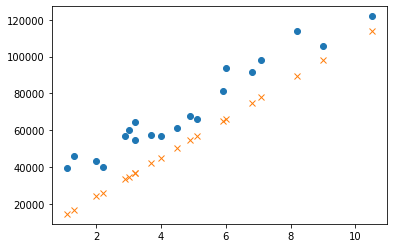

Iteration = 10, Loss = 813204225.7880322


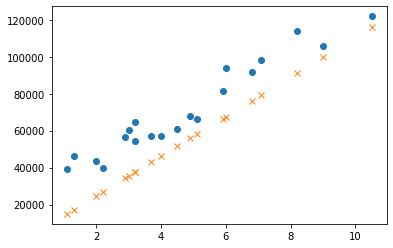

Iteration = 11, Loss = 809162706.2032187


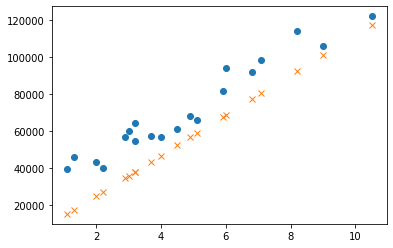

Iteration = 12, Loss = 806051665.2181643


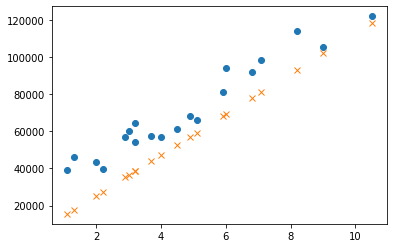

Iteration = 13, Loss = 803407089.7342846


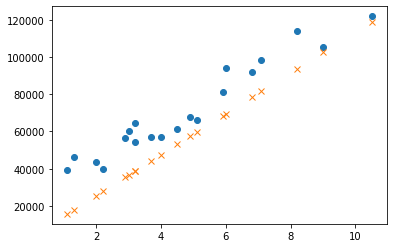

Iteration = 14, Loss = 800998727.6363524


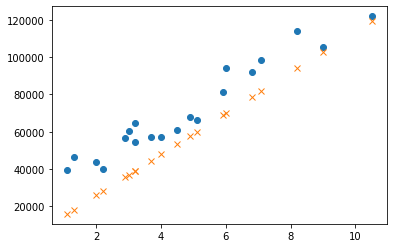

Iteration = 15, Loss = 798712313.1044717


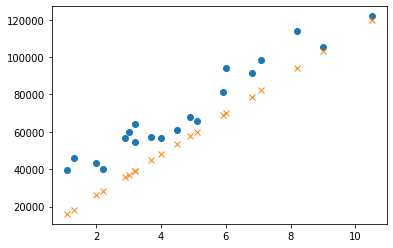

Iteration = 16, Loss = 796491129.8335528


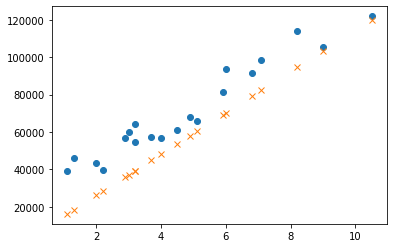

Iteration = 17, Loss = 794307016.2009083


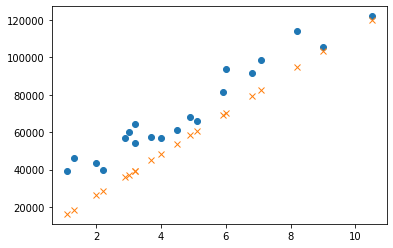

Iteration = 18, Loss = 792145978.7735356


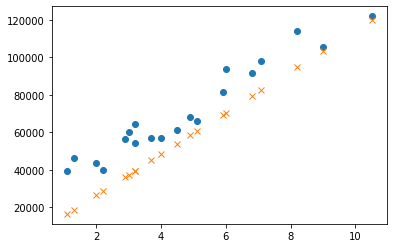

Iteration = 19, Loss = 790001054.0989555


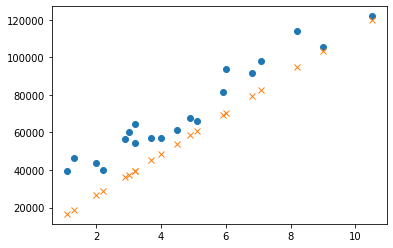

Iteration = 20, Loss = 787868766.9084897


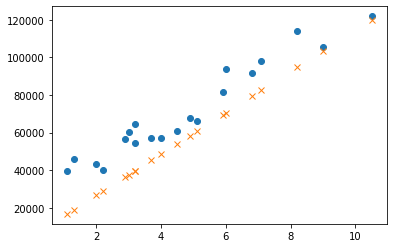

In [21]:
parameters, loss = train(X_train, y_train, 0.01, 20)

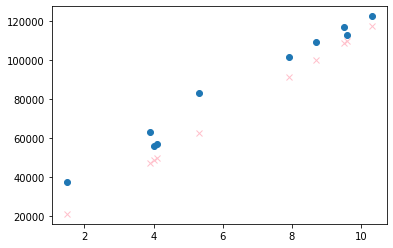

In [22]:
pred = X_test * parameters['w'] + parameters['b']
plt.figure()
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, pred, 'x', color='pink')
plt.show()

In [172]:
#cost for valid dataset
cost_function(pred, y_test)

200521315.33264816

In [173]:
def new_pred(x):
    n_pred = x * parameters['w'] + parameters['b']
    return(n_pred)

In [174]:
new_pred(15)

215272.22182049966